IMPORTING THE NECESSORY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics



In [3]:
df=pd.read_csv(r"C:\Users\madar\OneDrive\Documents\car data.csv")                #loading the file to dataframe

In [21]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,Manual,0
6,ciaz,2015,6.75,8.12,18796,0,0,Manual,0
7,s cross,2015,6.50,8.61,33429,1,0,Manual,0
8,ciaz,2016,8.75,8.89,20273,1,0,Manual,0
9,ciaz,2015,7.45,8.92,42367,1,0,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


DATA CLEANING 

In [9]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [22]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [79]:
df['Transmission'].value_counts()

Transmission
0    261
1     40
Name: count, dtype: int64

In [78]:
df.replace({'Manual':0,'Automatic':1},inplace=True) #replacing string names to a integer values for prediction

In [10]:
df.replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)  #replacing string names to a integer values for prediction

TRAINING THE MODEL

In [8]:
from sklearn.model_selection import train_test_split         #importing train and split function for modeling
from sklearn.linear_model import LinearRegression             #we will use linear regression technique for precting the values

In [82]:
x=df.drop(['Year','Selling_Price','Car_Name','Selling_type'],axis=1)            #feeding the data
y=df['Selling_Price']                                                                         # target variable which is dependent on x

In [83]:
print(x)

     Present_Price  Driven_kms  Fuel_Type  Transmission  Owner
0             5.59       27000          0             0      0
1             9.54       43000          1             0      0
2             9.85        6900          0             0      0
3             4.15        5200          0             0      0
4             6.87       42450          1             0      0
..             ...         ...        ...           ...    ...
296          11.60       33988          1             0      0
297           5.90       60000          0             0      0
298          11.00       87934          0             0      0
299          12.50        9000          1             0      0
300           5.90        5464          0             0      0

[301 rows x 5 columns]


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)                  #training the model


In [85]:
x_train.shape, x_test.shape

((210, 5), (91, 5))

In [86]:
model=LinearRegression()
model.fit(x_train,y_train)                    #fit the model

LinearRegression()

In [87]:
model.intercept_

1.054195835499037

In [88]:
model.coef_

array([ 5.09171330e-01, -1.79217057e-05,  1.69914253e+00,  5.78743839e-01,
       -1.61774746e+00])

EVALUATION AND TESTING

In [101]:
y_pred=model.predict(x_test)              #model prediction 
print(y_pred)

[ 0.72902135  2.85873278  1.35889296  2.26715397  4.37467172  4.6398816
  6.05078253 21.67182924  3.87596811 20.79956305  3.88420947 11.82358468
  7.49741755  0.40251279  1.07824447  1.10269595  5.49056899  8.93239364
  1.49800869  6.84019951 -0.64763748  1.139776    1.21416464  3.5969155
  1.18608809  3.29010912  3.09747054  3.91159466  0.96931838  3.99358712
  3.29236221  7.09069034  2.84894978  1.25514849  4.00623729  1.48904784
  0.58987096  8.92575965  3.65531191  7.47666367  5.56905379  5.11617454
 15.99111668  6.42527711  4.89923944  1.50343124  1.4930464   5.25954818
  7.78214559  4.24740888  5.81273677  0.71391297  1.05402255  6.93389266
  0.81186404  5.12288284  3.79906921 48.50471045  1.7291987   3.23652666
  1.2112614   1.44340978  2.99284091  7.47666367  0.35872968 16.49838634
 18.20094838  7.58859117  4.51627226  1.37823866  4.5422627   4.798446
  0.23857087  1.05117456  5.07881337  3.0858035   4.76078486  1.05013934
  1.88883398  1.39229122  1.66203399  1.29841072  6.036

In [98]:
y_test

174    0.38
248    4.00
154    0.50
28     1.95
19     2.65
       ... 
131    0.75
233    3.90
240    5.35
8      8.75
244    5.95
Name: Selling_Price, Length: 91, dtype: float64

In [94]:
error_score=metrics.r2_score(y_test,y_pred)         #R2_score calculation
print(error_score)

0.8479500423594881


In [93]:

print(metrics.mean_absolute_error(y_test,y_pred))


1.3710020666522011


Since our model showing a good R2 score .Hence it is a good model.

BARPLOT  

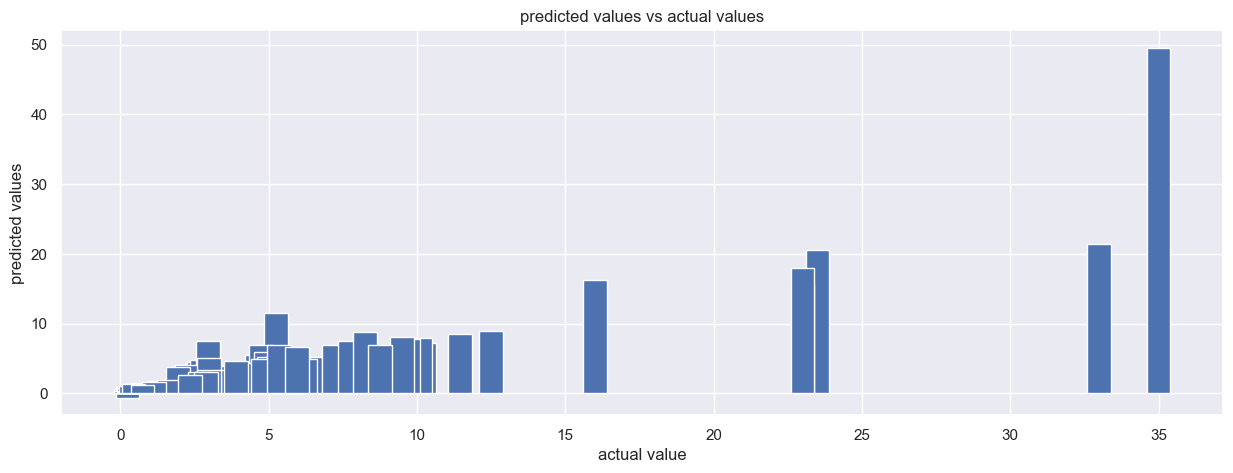

In [76]:
plt.bar(y_test,y_pred)                                               #barplot which shows deviation from actual values to predicted values
plt.title("predicted values vs actual values")
plt.xlabel("actual value")
plt.ylabel("predicted values")
plt.show()

LINEAR REGRESSION PLOT

Text(0.5, 1.0, 'LinearRegression plot ')

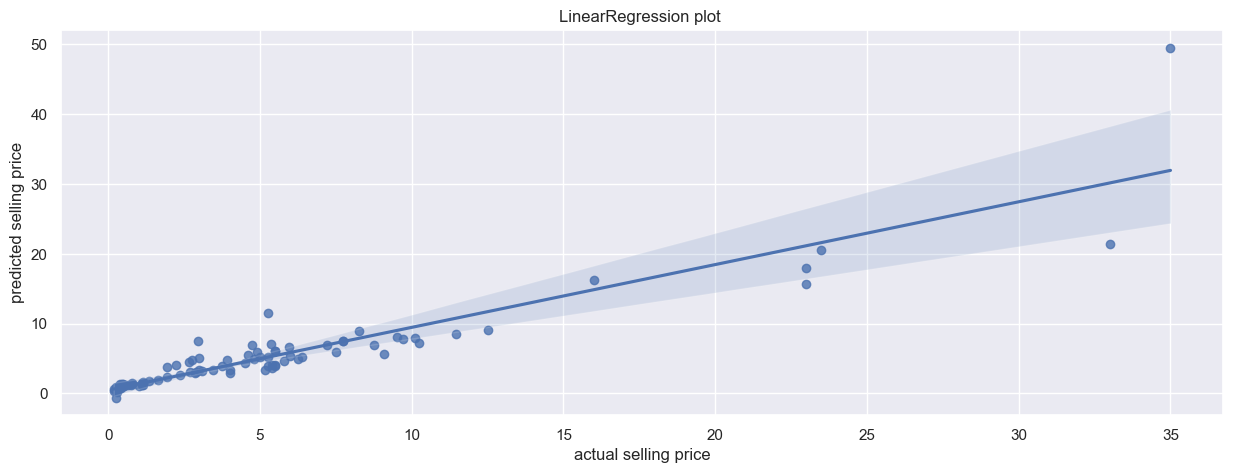

In [71]:
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual selling price')
plt.ylabel('predicted selling price')
plt.title('LinearRegression plot ')
